## 2. Image segmentation with K-means

An image segmentation task involves dividing an image into distinct regions based on the similarities of pixel values, usually their color. This can be used for various applications like object detection, medical imaging, or background separation. 

*Clustering* can be used for this task too. In this programming task, K-means is used for segmenting an image. The process can be described in the following steps:

- Download the image data to be segmented to the working directory
- Reshape the image data: The image is reshaped into a 2D array where each row represents a pixel and the columns represent the color channels (e.g., RGB). This step is necessary because k-means clustering in this context is applied on a per-pixel basis
- Apply K-means Clustering
- Post-process: After clustering, each pixel's color is replaced with the centroid color of the cluster it belongs to. This results in segmenting the image into regions of similar colors
- Reconstruct the mage: The 2D array is reshaped back into the original image dimensions, but now with the segmented colors

    Result: The final output is a segmented image where each region represents a cluster of pixels with similar colors or intensities. 

Downloaded flower.png successfully.


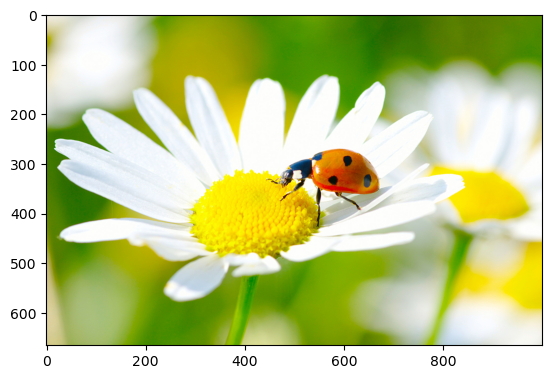

In [25]:
import numpy as np
np.random.seed(0)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import urllib.request

# If you're saving in the current working directory, use this instead:
filename = "flower.png"
DOWNLOAD_ROOT = "https://cloud.uni-koblenz.de/s/GsYbHkQ2EAG5gHF/download/flower.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT 

try:
    urllib.request.urlretrieve(url, filename)
    print(f"Downloaded {filename} successfully.")
except Exception as e:
    print(f"An error occurred: {e}")

from matplotlib.image import imread
image = imread(filename)
image.shape
plt.imshow(image)

In [26]:
# Get details of the input image:
print("Image shape is: ", image.shape)
# print(image)
# is of the form (h, w, c) -> need to reconstruct into (h*w, c)
h, w, c = image.shape
print(h, w, c)


Image shape is:  (666, 1000, 3)
666 1000 3


In [27]:
# to do: reshape the image data
# X = 
X = image.reshape((h*w, c))
print(X.shape)
# new shape is: (666000, 3), as we desired
# where each row is a pixel data point, each column is its features
# do we need to normalize the pixel values? -> no, the image is already normalized

(666000, 3)


In [28]:
# to do: apply kmeans clustering with k=16
kmeans = KMeans(16)
labels = kmeans.fit_predict(X=X)
print(labels)


[1 1 1 ... 1 1 1]


In [29]:
# interpret results from kmeans' label predictions
print(labels[:100]) # is working, distinct label predictions for each
# what does label mean?
# each label corresponds to the cluster, the data point belongs to
# next step is to modify the data points' features to match label (cluster centres) features
# get cluster centers
cluster_centers = kmeans.cluster_centers_
update_pixel_values = cluster_centers[labels]
print(update_pixel_values)
# reconstruct the image
reconstructed_img = update_pixel_values.reshape((h,w,c))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1]
[[0.9111018  0.92920583 0.9222261 ]
 [0.9111018  0.92920583 0.9222261 ]
 [0.9111018  0.92920583 0.9222261 ]
 ...
 [0.9111018  0.92920583 0.9222261 ]
 [0.9111018  0.92920583 0.9222261 ]
 [0.9111018  0.92920583 0.9222261 ]]


### Task 13: Test Kmeans for different k: apply K-means Clustering for k = {16, 14, 12, 10, 8, 6, 4, 2}  and Plot the Original Image, as well as the Other 8 Segmented Images in a 3-row x 4-column Plot

In [30]:
print(reconstructed_img.shape)

(666, 1000, 3)


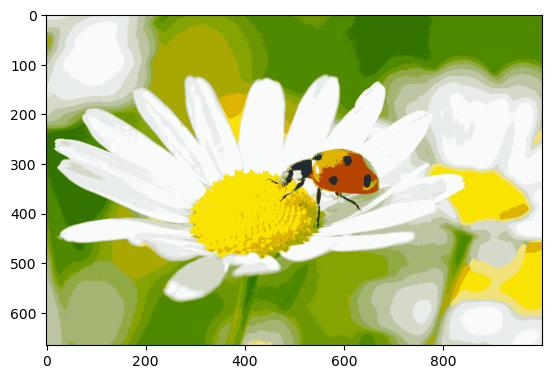

In [31]:
plt.imshow(reconstructed_img)

In [84]:
segmented_imgs = []
n_colors = (16, 14, 12, 10, 8, 6, 4,3, 2)

# will need to define a function

def segment_image(image, clusters):
    # get image shape:
    h, w, c = image.shape

    X = image.reshape((h*w, c))

    kmeans = KMeans(clusters)
    labels = kmeans.fit_predict(X=X)

    cluster_centers = kmeans.cluster_centers_
    update_pixel_values = cluster_centers[labels]

    # reconstruct the image
    reconstructed_img = update_pixel_values.reshape((h,w,c))

    return reconstructed_img

    


for color in n_colors:
    segmented_imgs.append(segment_image(image=image, clusters=color))

# segmented_imgs = [segment_image(image=image, clusters=n_color) for n_color in n_colors ]
# to do: clustering for different k values

  
# to do: plot the original and 8 segmented images in a 3-row x 4-column plot


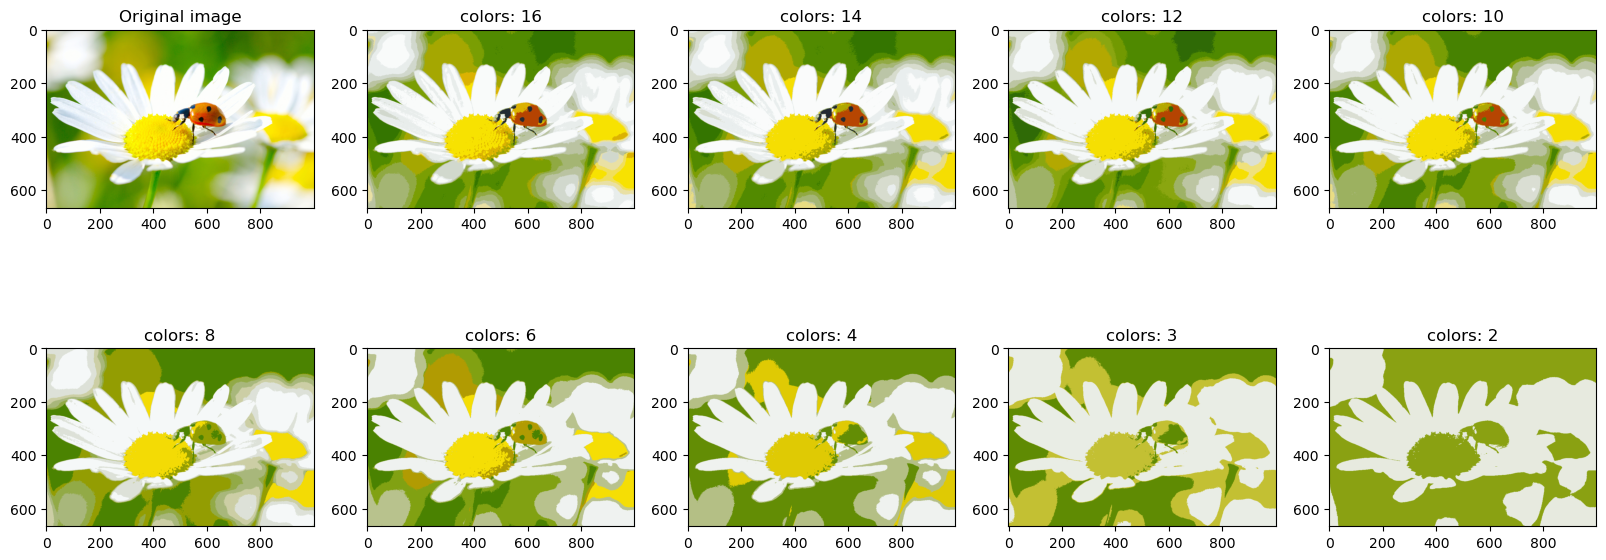

In [89]:
# Now we plot the original image and 8 segmented images in 3x4 plot
fig = plt.figure(figsize=(20, 20))

plt.subplot(5,5,1)
plt.title("Original image")
plt.imshow(image)

for idx in range(len(segmented_imgs)):
    plt.subplot(5, 5, idx+2)
    color_val = n_colors[idx]
    plt.title(f'colors: {color_val}')
    plt.imshow(segmented_imgs[idx])


# to do: save the plot from previous task in an image file.

plt.savefig("n_colors segementation.jpg")
